# Intro to data visualization

``Hello world, data visualization!``

__main reference:__ https://github.com/StephenElston/ExploringDataWithPython/blob/master/LearningDataVisualization.ipynb

### Datasets:

_Heart Disease UCI:_ https://www.kaggle.com/ronitf/heart-disease-uci  
_House Sales in King Country, USA:_ https://www.kaggle.com/harlfoxem/housesalesprediction  

### Dependências:
Caso não tenha seaborn utilizar o comando `` pip install seaborn ``.

### Introdução:
Será abordado alguns tipos de visualização de dados utilizado as bibliotecas _pandas_, _matplotlib_ e _seaborn_. Dos datasets apresentados, um apresenta classes como atributo alvo, enquanto no outro o atributo alvo são valores contínuos (regressão).
Irei apresentar algumas das formas que eu utilizo para representar os dados, algumas delas foram retiradas da referência apresentada acima, outras eu utilizo da forma que me é desejado em alguma determinada situação, então pode não ser da maneira mais correta de análisar, até porque estou aprendendo :)
Das representações que buscarei demostrar serão elas: visualização de atributos isolados, visualição de relacionamento/correlação (todas no plano 2D), visualiazação de atributos catégoricos e visualização de atributos contínuos, buscando sempre entender que tipo de informação cada representação nos dá. 

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load heart disease dataset

In [2]:
df_heart = pd.read_csv("dataset/heart.csv")

In [3]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Nesse dasaset a maioria dos dados são catégoricos, então a representação visual dos dados se limitam um pouco. O atributo alvo é o 'target' que tem como valores 1(com a doença) e 2(sem a doença). O nosso objetivo é tentar extrair informações com relação aos demais atributos com relação ao atributo alvo.

## Dados Univariados

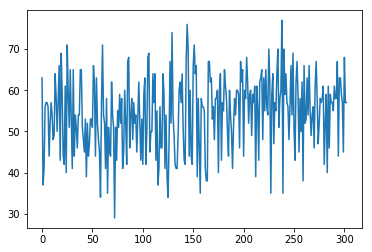

In [8]:
plt.plot(df_heart['age'])

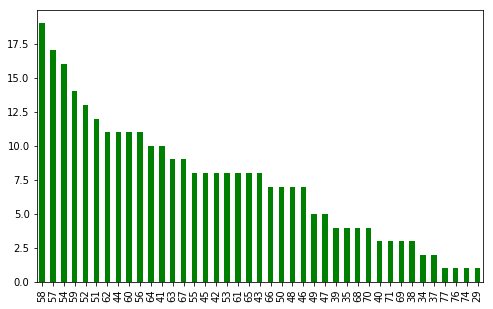

In [42]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))

counts = df_heart['age'].value_counts()
counts.plot.bar(color='green', ax=ax)

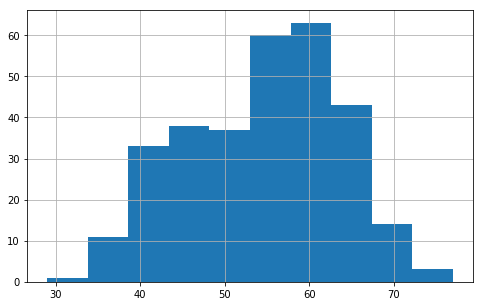

In [47]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
df_heart['age'].hist(ax=ax)

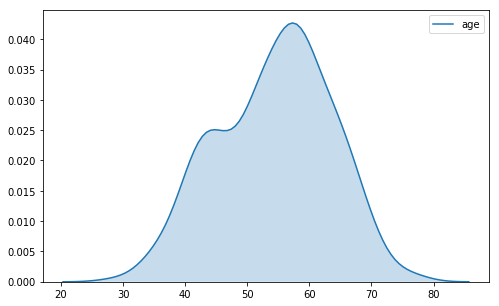

In [48]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
sns.kdeplot(df_heart['age'], shade=True, ax=ax)

{'whiskers': [<matplotlib.lines.Line2D at 0xee96470>,
 'caps': [<matplotlib.lines.Line2D at 0xee96710>,
 'boxes': [<matplotlib.lines.Line2D at 0xee961f0>],
 'medians': [<matplotlib.lines.Line2D at 0xee96e10>],
 'fliers': [<matplotlib.lines.Line2D at 0xee96ed0>],
 'means': []}

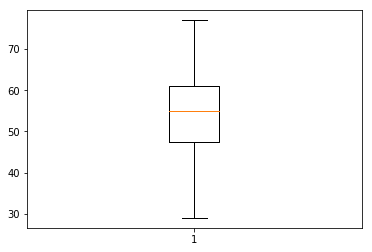

In [52]:
plt.boxplot(df_heart['age'])

## Dados Multivariados

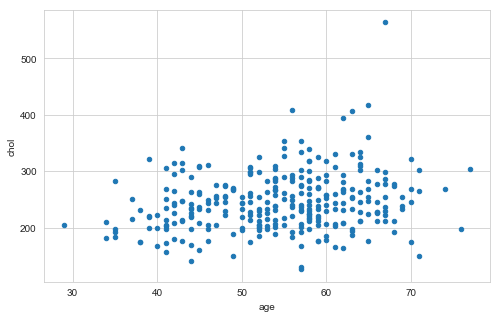

In [71]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
df_heart.plot(kind='scatter', x='age', y='chol', ax=ax)

In [68]:
# instances with disease dataframe
withd = df_heart[df_heart['target']==1]

# instances without disease dataframe
withoutd = df_heart[df_heart['target']==0]

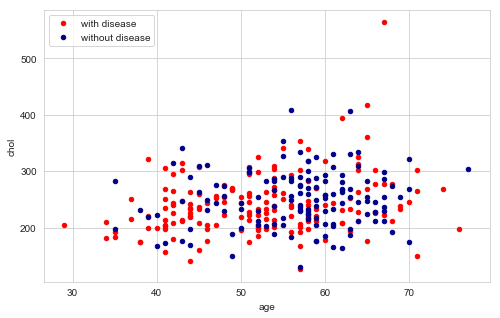

In [73]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))

withd.plot(kind='scatter', x='age', y='chol', ax=ax, color='Red', label='with disease')
withoutd.plot(kind='scatter', x='age', y='chol', ax=ax, color='DarkBlue', label='without disease')
plt.legend()

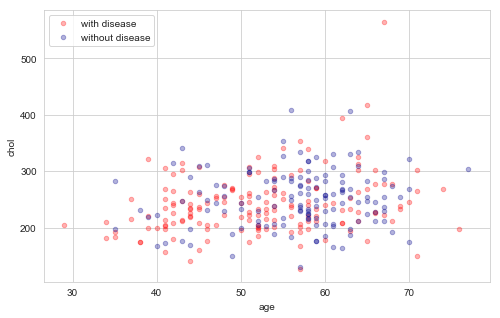

In [74]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))

withd.plot(kind='scatter', x='age', y='chol', ax=ax, color='Red', label='with disease', alpha=0.3)
withoutd.plot(kind='scatter', x='age', y='chol', ax=ax, color='DarkBlue', label='without disease', alpha=0.3)
plt.legend()

Text(0, 0.5, 'Cholesterol')

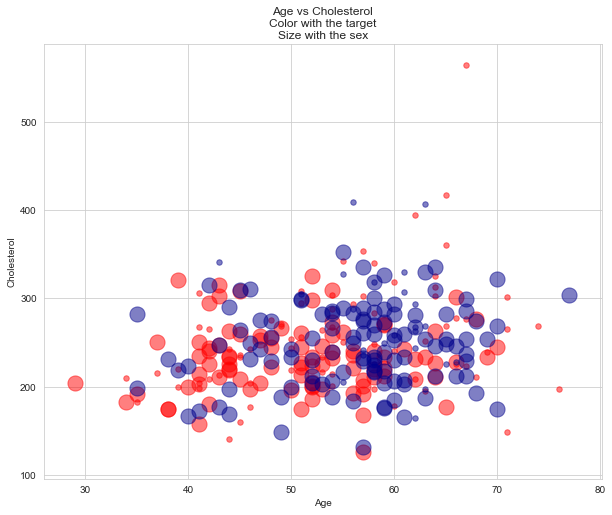

In [103]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
colors = ['DarkBlue', 'Red']

for index, value in enumerate(df_heart['sex']):
    ax.scatter(x=df_heart['age'][index], y=df_heart['chol'][index],
               color=colors[df_heart['target'][index]], s=30+(value*200), alpha=0.5)

ax.set_title("Age vs Cholesterol\nColor with the target\nSize with the sex")    
ax.set_xlabel("Age")
ax.set_ylabel("Cholesterol")

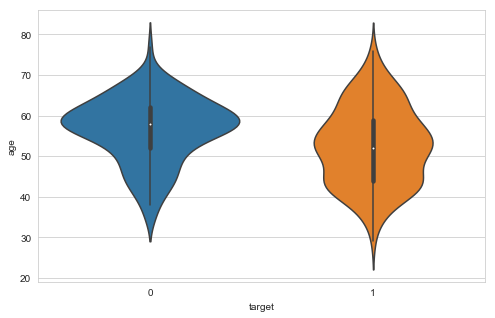

In [59]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
sns.set_style("whitegrid")
sns.violinplot(data=df_heart, y='age', x='target', ax=ax)

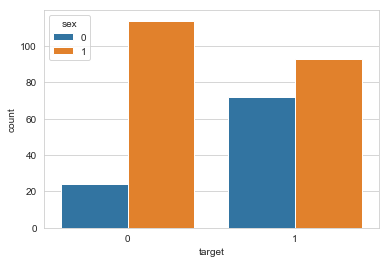

In [106]:
sns.countplot(data=df_heart, x='target', hue='sex')

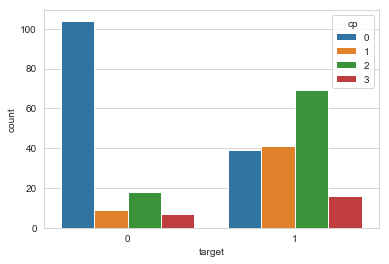

In [107]:
sns.countplot(data=df_heart, x='target', hue='cp')

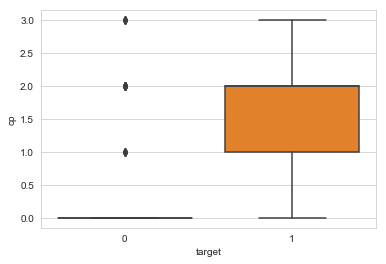

In [119]:
sns.boxplot(data=df_heart, x='target', y='cp')

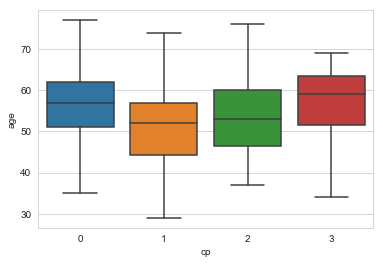

In [114]:
sns.boxplot(data=df_heart, x='cp', y='age')

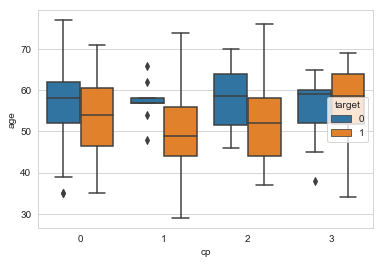

In [120]:
sns.boxplot(data=df_heart, x='cp', y='age', hue='target')

Da para apresentar qual a idade aproximada das pessoas que tem um nível de dor no peito e se tem a doença ou não (mostrando que o 'y' normalmente é o alvo de informação que a gente tá buscando)